In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter

data = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/airbnb/AirBNB.csv')
df = pd.DataFrame(data)

/Users/djmore/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/djmore/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [7]:
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009,0.0,1.0


In [8]:
df.fillna(0, inplace=True)
df.drop(['id'],inplace=True,axis=1)

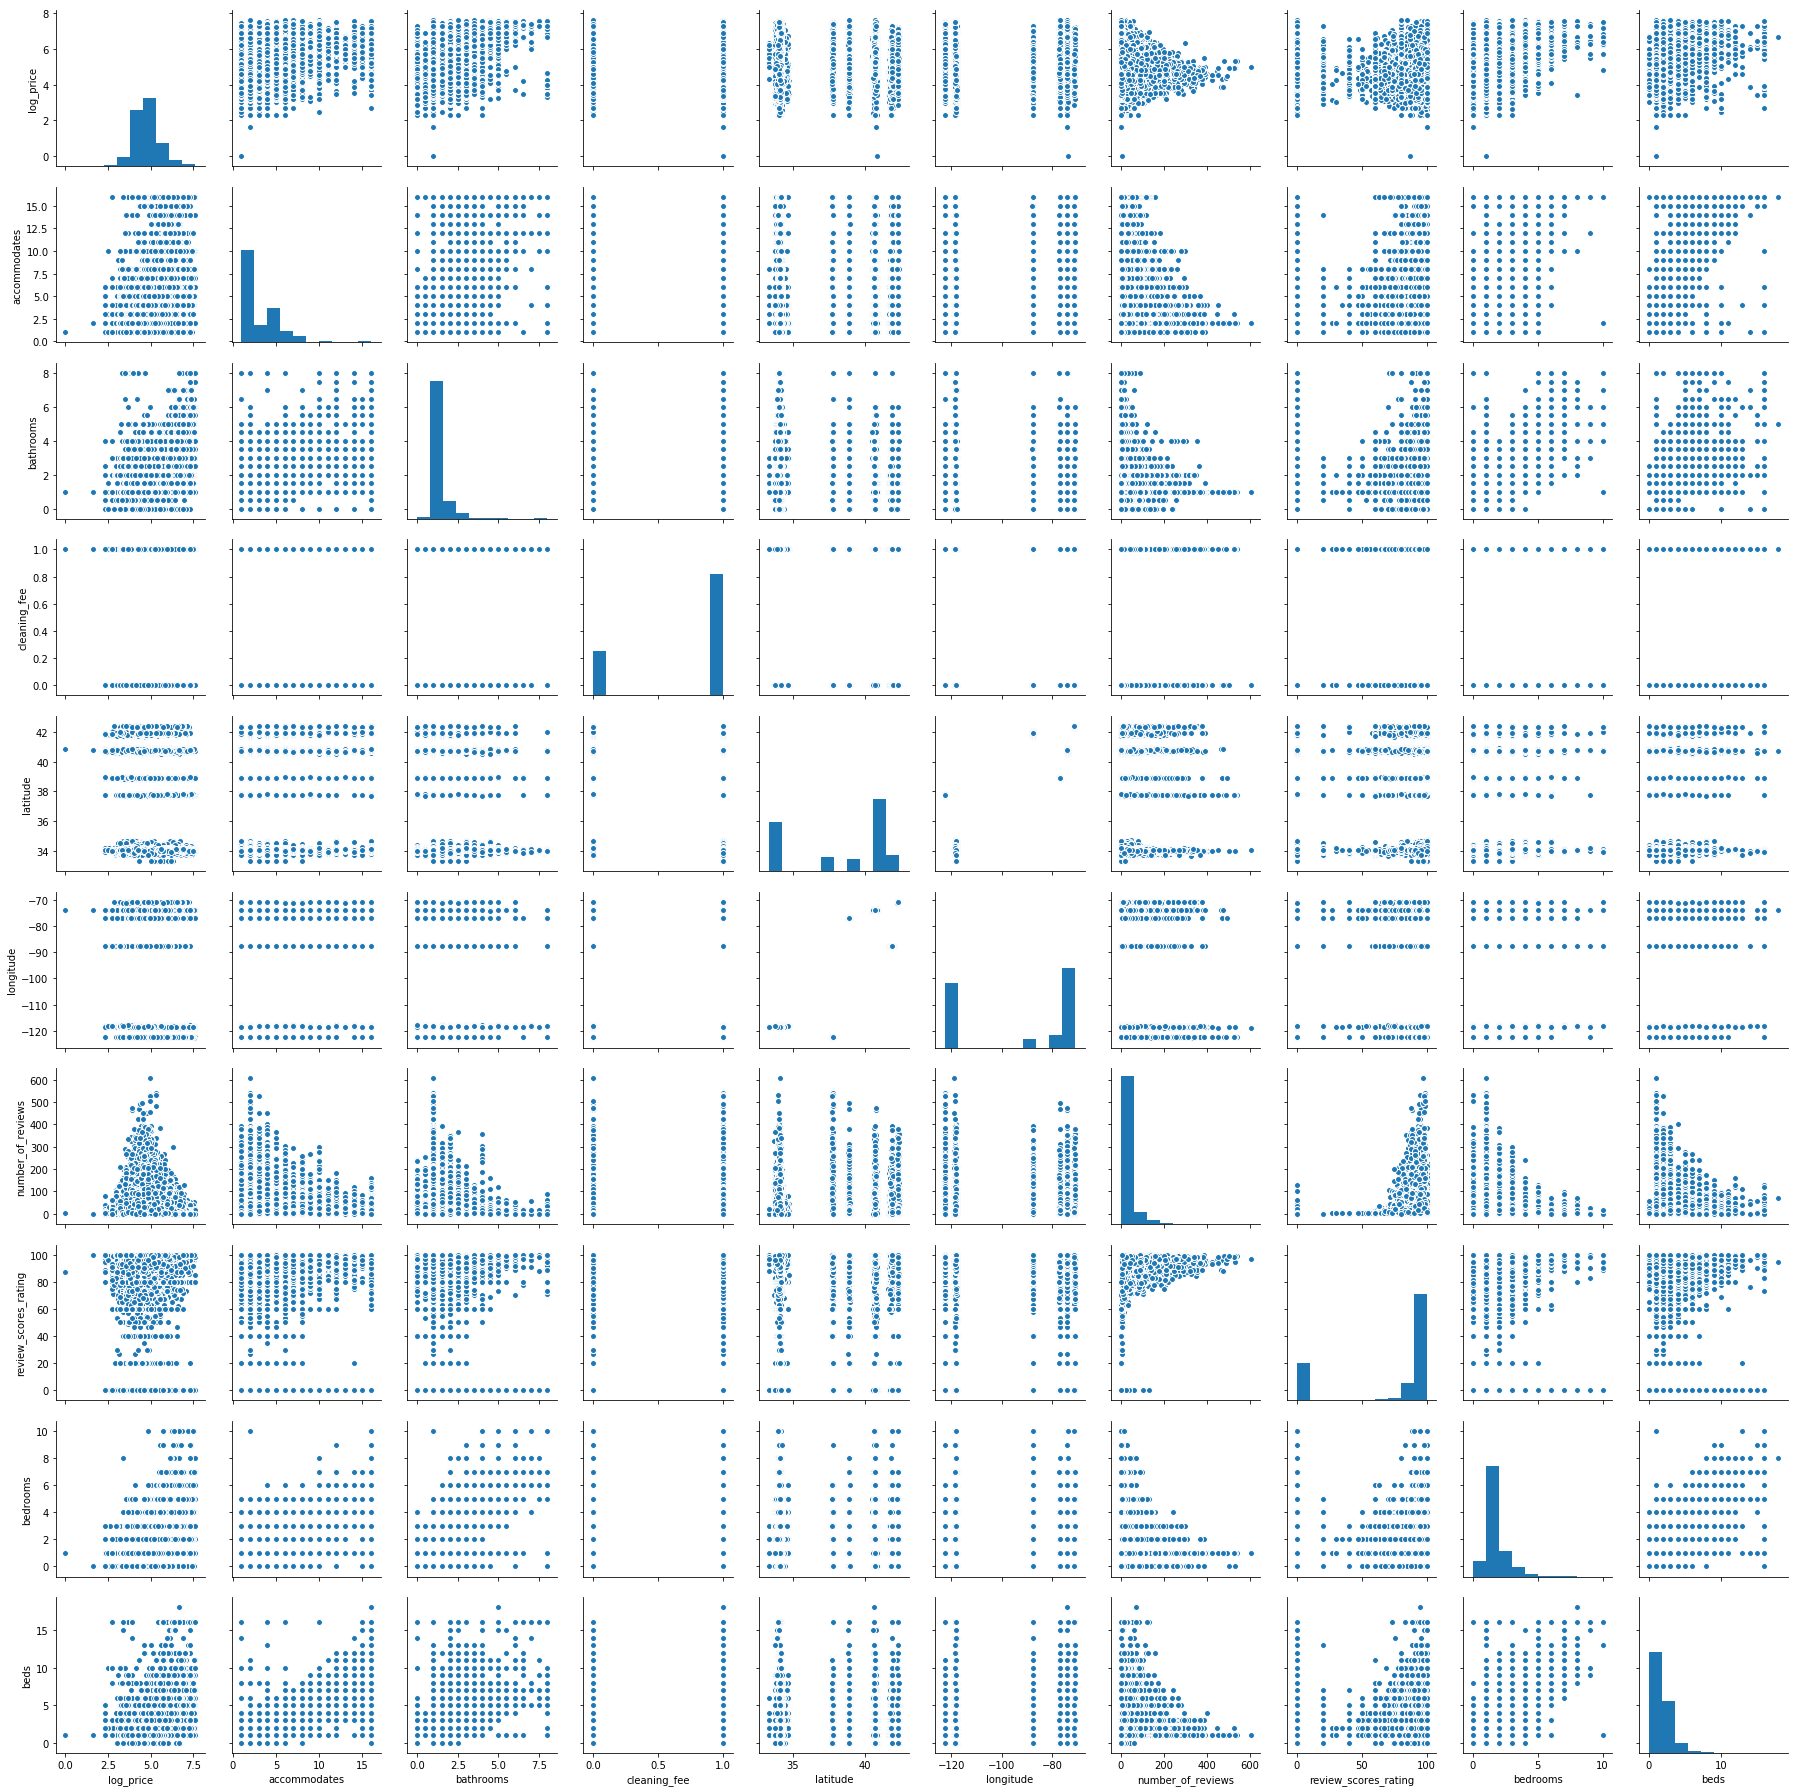

In [9]:
import seaborn as sns
sns.pairplot(df)

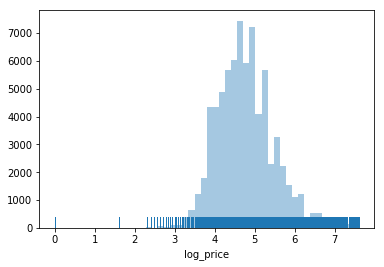

In [17]:
sns.distplot(df['log_price'],kde=False, rug=True)b

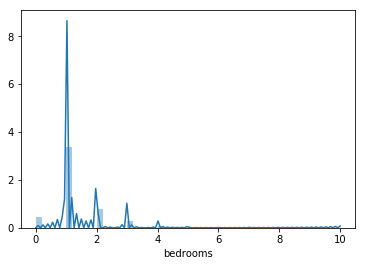

In [15]:
sns.distplot(df['bedrooms'])


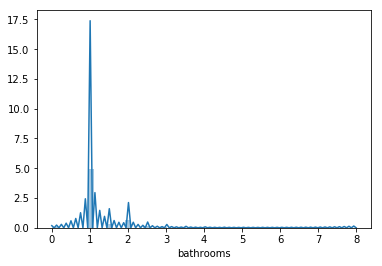

In [16]:
sns.distplot(df['bathrooms'])

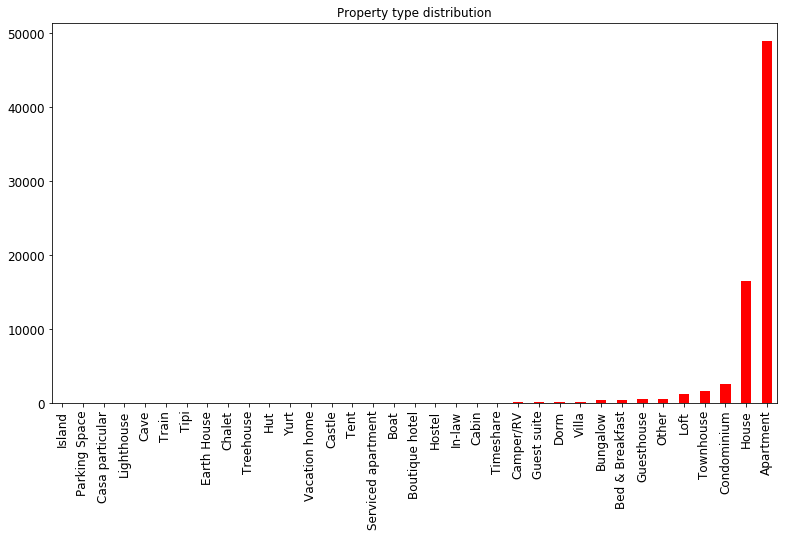

In [5]:
property = df.property_type
p = Counter(property)

property_df = pd.DataFrame.from_dict(p, orient='index').sort_values(by=0)
property_df.columns = ['property_type']
property_df.plot.bar(y= 'property_type', 
                     color = 'Red',
                     fontsize = 12,
                     legend = False,
                     figsize= (13, 7),
                     title = "Property type distribution")

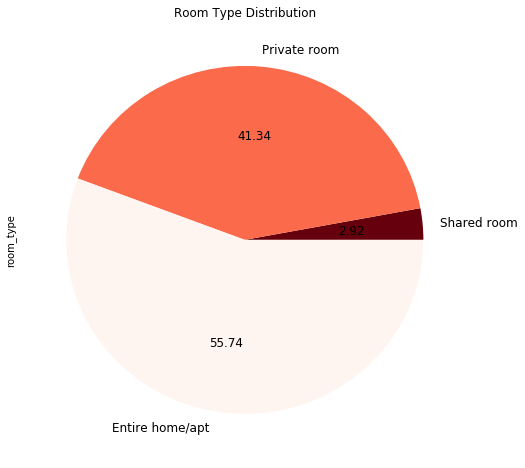

In [6]:
room = df.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Reds_r', 
                 figsize=(8,8), 
                 fontsize = 12, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

,room_type,log_price
2,Shared room,8352.499673
1,Private room,132593.691406
0,Entire home/apt,213457.732606


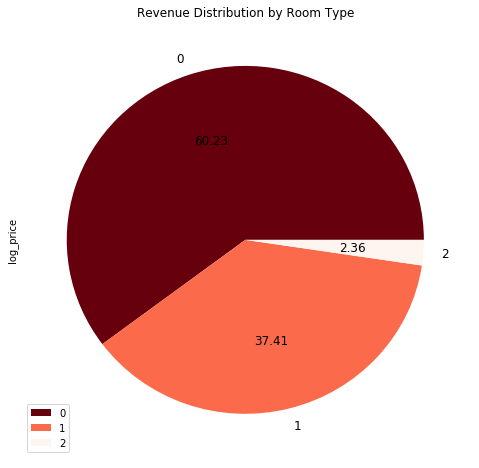

In [13]:
revenue = df.groupby(['room_type'])['log_price'].agg(np.sum).reset_index()
display(revenue.sort_values(['log_price']))
#top5_revenue = revenue.sort_values(['log_price']).tail(5)
revenue.plot.pie(y = 'log_price',
                 colormap = 'Reds_r', 
                 figsize=(8,8), 
                 fontsize = 12, autopct = '%.2f',
                 legend = True,
                 title = 'Revenue Distribution by Room Type')

#### Top 5 Property Type contributing to revenue

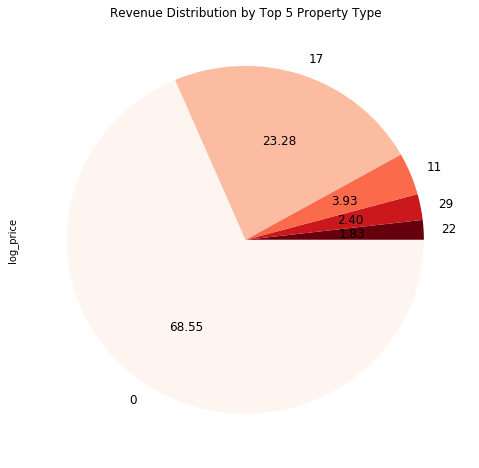

In [14]:
revenue = df.groupby(['property_type'])['log_price'].agg(np.sum).reset_index()
#display(revenue.sort_values(['log_price']))
top5_revenue = revenue.sort_values(['log_price'])
top5_revenue.tail(5).plot.pie(y = 'log_price', 
                 colormap = 'Reds_r', 
                 figsize=(8,8), 
                 fontsize = 12, autopct = '%.2f',
                 legend = False,
                 title = 'Revenue Distribution by Top 5 Property Type')

#### Popular neighbourhood on airbnb based on the aggregate price of rental

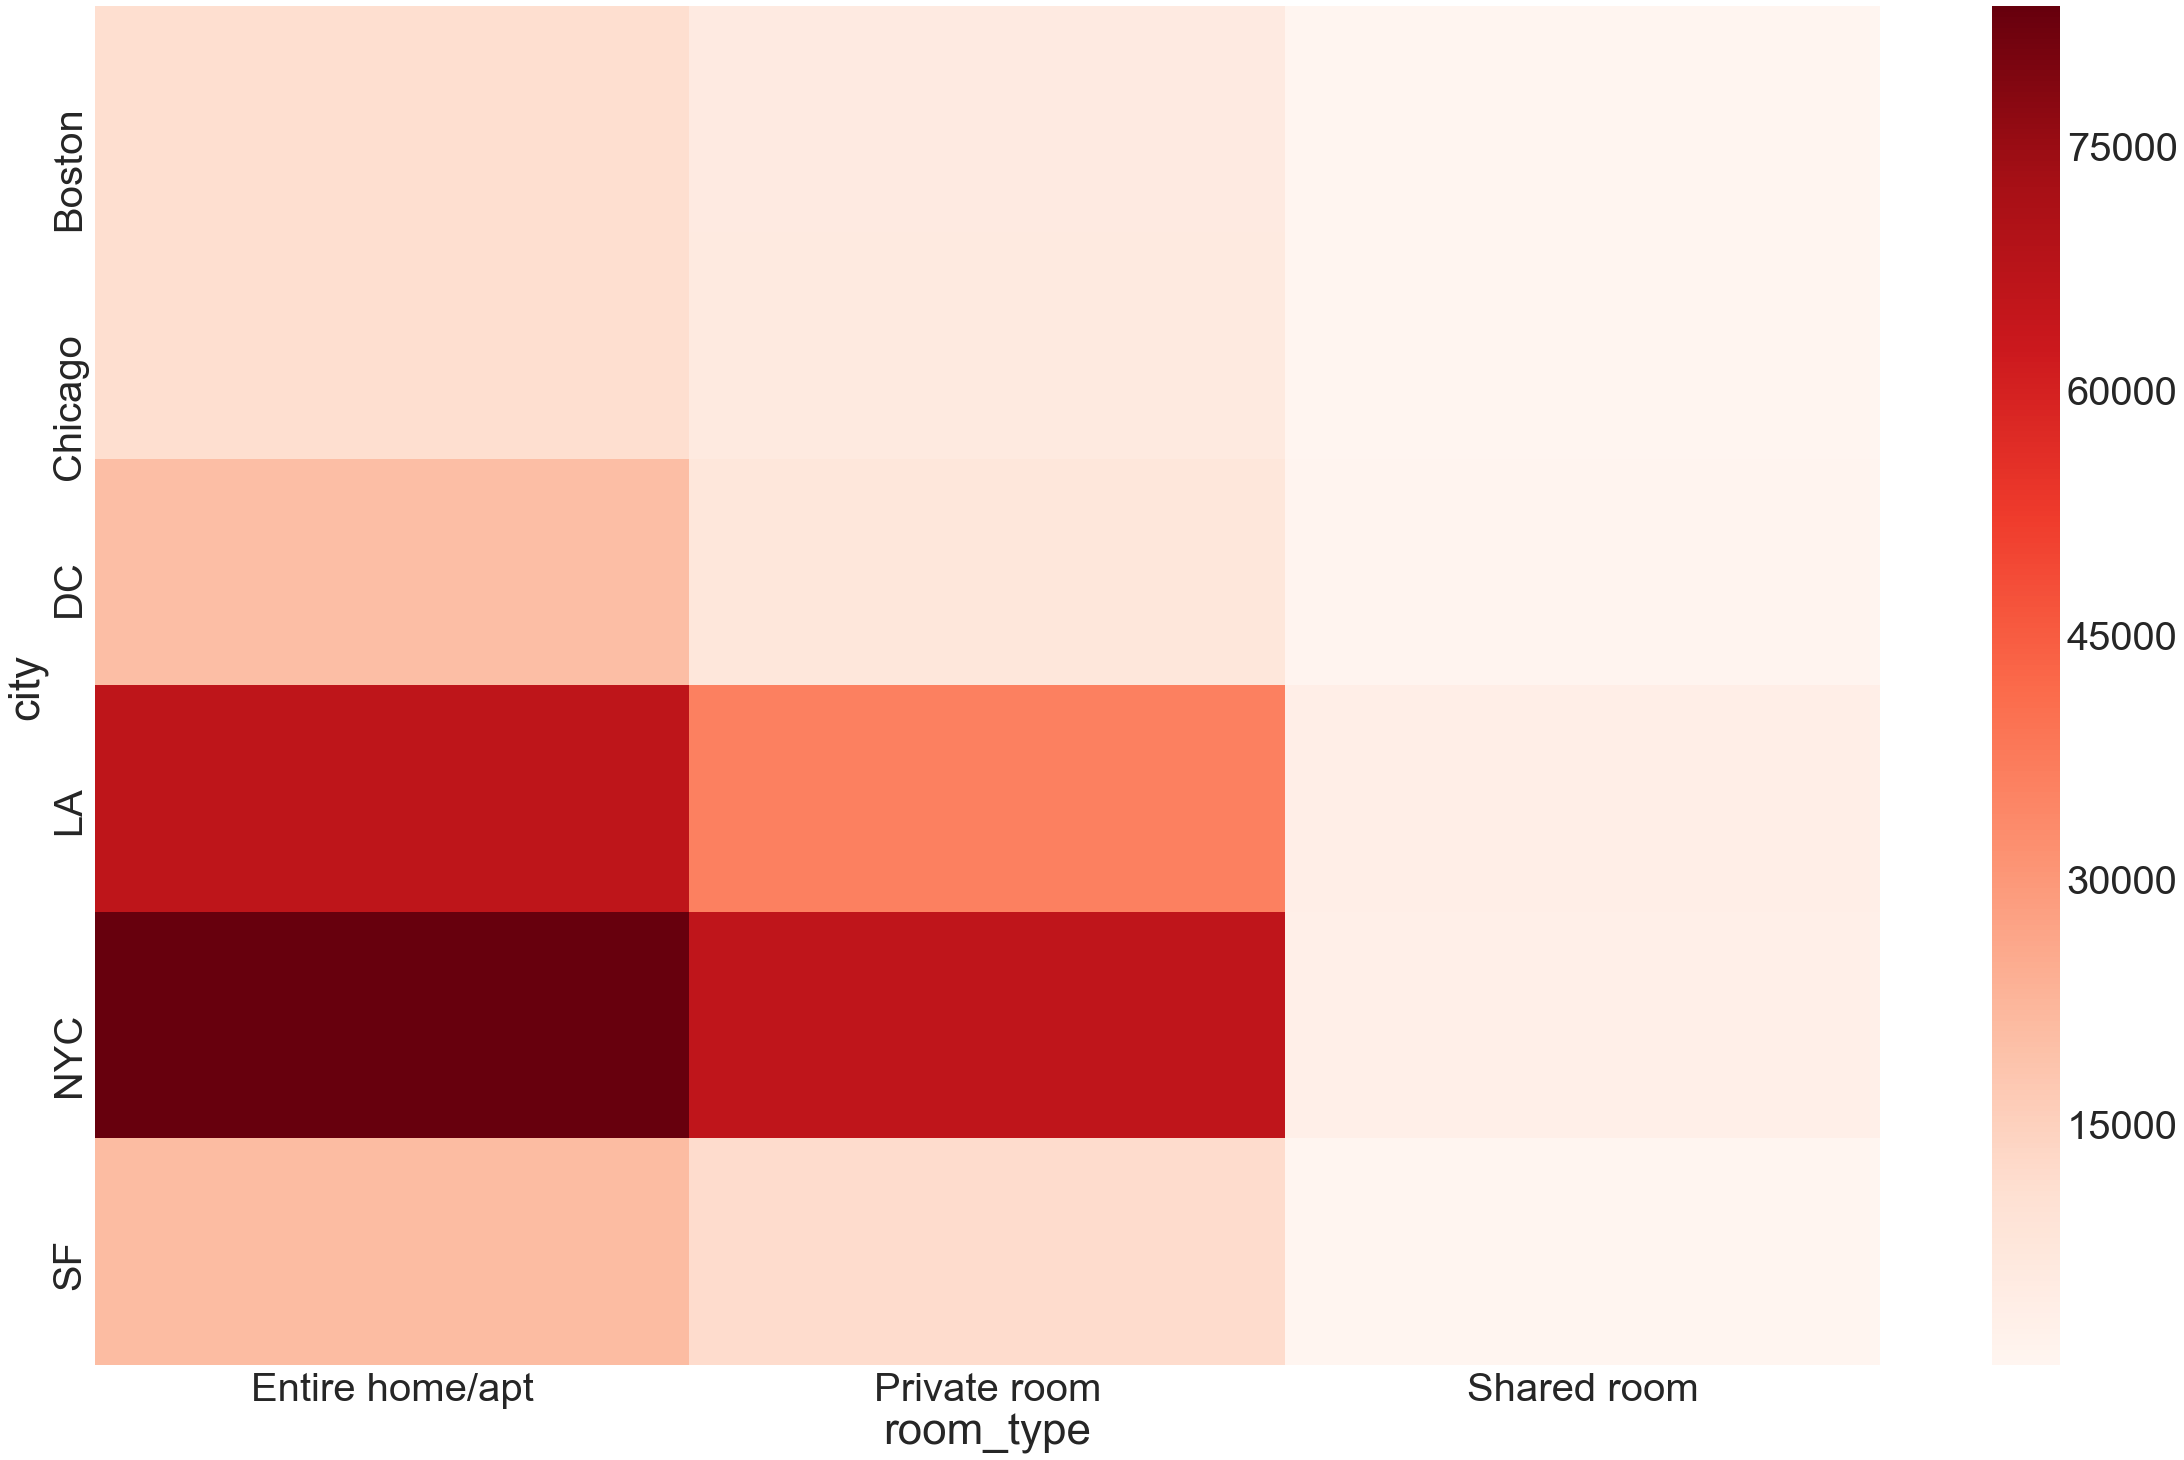

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

prices = df.pivot_table(index='city', columns='room_type', values='log_price', aggfunc='sum', fill_value=0)
fig, ax = plt.subplots(figsize=(40,25))
sns.set(font_scale=4)
sns.heatmap(prices, ax=ax, cbar=True, cmap="Reds",annot_kws={"size": 2})